In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
dataset = pd.read_csv('student_scores.csv')

In [3]:
dataset.shape

(25, 2)

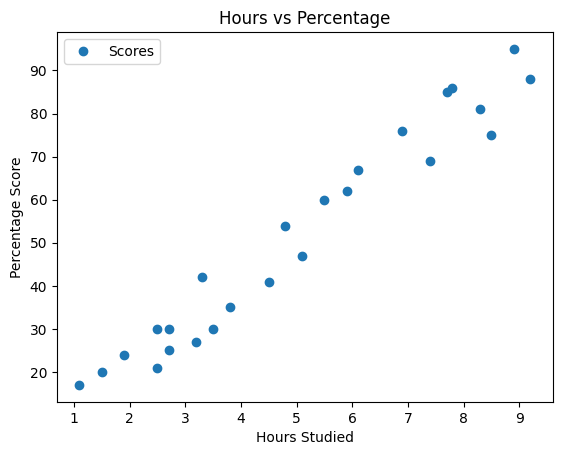

In [4]:
dataset.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score') 
plt.show()

Теперь у нас есть представление о наших данных. Следующим шагом является разделение данных на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе данных всего два столбца. Мы хотим предсказать процентную оценку в зависимости от изученных часов. Поэтому наш набор атрибутов будет состоять из столбца «Часы», а меткой будет столбец «Оценка».

In [5]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values

In [6]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Приведенный выше скрипт разделяет 80% данных на обучающий набор, а 20% данных – на набор тестов. Переменная test_size -–это то место, где мы фактически указываем пропорцию набора тестов.

In [7]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

модель линейной регрессии в основном находит наилучшее значение для точки пересечения и наклона, в результате чего получается линия, которая наилучшим образом соответствует данным. Чтобы увидеть значение точки пересечения и наклона, вычисленное алгоритмом линейной регрессии для нашего набора данных, выполните следующий код.

In [8]:
print(regressor.intercept_)
print(regressor.coef_)

2.0181600414346974
[9.91065648]


Теперь, когда мы обучили наш алгоритм, пришло время сделать некоторые прогнозы. Для этого мы воспользуемся нашими тестовыми данными и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогнозы на тестовых данных, выполним следующий код

In [9]:
y_pred = regressor.predict(X_test)

Y_pred – это массив numpy, который содержит все предсказанные значения для входных значений в серии X_test. Чтобы сравнить фактические выходные значения для X_test с прогнозируемыми значениями, выполните следующий скрипт:

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
print("Сравнение фактических и предсказанных значений:")
print(df)

from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

def calculate_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-8 
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

mape = calculate_mape(y_test, y_pred)

print("--- Метрики качества модели ---")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Коэффициент детерминации (R2): {r2:.2f}")
print(f"Средняя абсолютная процентная ошибка (MAPE): {mape:.2f}%")


Сравнение фактических и предсказанных значений:
   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033
--- Метрики качества модели ---
Средняя абсолютная ошибка (MAE): 4.18
Коэффициент детерминации (R2): 0.95
Средняя абсолютная процентная ошибка (MAPE): 12.57%


In [22]:
from main import compute_regression


m, b = compute_regression(X, y)

y_pred_manual = m * X_test + b
y_pred_manual = y_pred_manual.flatten()
df_manual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_manual})
print(df_manual)

mae = mean_absolute_error(y_test, y_pred_manual)
r2 = r2_score(y_test, y_pred_manual)

mape = calculate_mape(y_test, y_pred_manual)

print("--- Метрики качества модели ---")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Коэффициент детерминации (R2): {r2:.2f}")
print(f"Средняя абсолютная процентная ошибка (MAPE): {mape:.2f}%")

   Actual  Predicted
0      20  17.147378
1      27  33.766244
2      69  74.824618
3      30  26.923182
4      62  60.160913
--- Метрики качества модели ---
Средняя абсолютная ошибка (MAE): 4.07
Коэффициент детерминации (R2): 0.95
Средняя абсолютная процентная ошибка (MAPE): 12.20%



**Вывод о качестве модели**
Наша ручная регрессия получилась на чуточку точнее
Однако это одна и та же модель
- Модель имеет высокую объяснительную способность (R2 = 0.95).
- Абсолютные ошибки (MAE ~ 4, MAPE ~ 12%) показывают среднюю величину и относительную величину ошибки предсказаний соответственно.